# Mall Customer Segmentation

# Table of Contents:
1. Understanding Data
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Modeling
    * K-means
    * Hierarchical Clustering
    * DBSCAN  
5. Conclusion

# 1. Understanding Business Problem & Data

## Business Problem:

You own the mall and want to understand the customers like who can be easily converge [Target Customers] 
so that the sense can be given to marketing team and plan the strategy accordingly.

## Dataset Attributes:

CustomerID : Unique ID assigned to the customer

Gender : Gender of the customer

Age : Age of the customer

Annual Income (k$) : Annual income of the customer

Spending Score (1-1000) : Score assigned by the mall based on customer behavior and spending nature

In [103]:
# import libraries

#basic libraries
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# 
import warnings 
warnings.filterwarnings('ignore')

plt.style.use('seaborn-paper')
%matplotlib inline

In [104]:
# reading data
df = pd.read_csv('https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [105]:
# checking size of data
df.shape

(200, 5)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [107]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [108]:
# checking percentage of the Genre
df['Genre'].value_counts(normalize=True)*100

Female    56.0
Male      44.0
Name: Genre, dtype: float64

**Conclusion :**
* Dataset consist of 200 rows and 5 columns.
* There is no missing values in the dataset.
* Average **Age** of the customers is 38.85.
* Average  **Annual Income (k$)** of the customers is 60.56.
* Average **Spending Score (1-100)** of the customers is 50.20.
* %56 of customers are Female

# 2. Exploratory Data Analysis (EDA)

In [109]:
# get column names
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [110]:
# rename columns
df.rename(columns={'CustomerID':'id', 'Genre':'gender', 'Age':'age', 'Annual Income (k$)':'annual_income',
       'Spending Score (1-100)':'spending_score'}, inplace=True)

In [111]:
df.head()

,id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [112]:
# drop useless column : id
df.drop('id', axis=1, inplace=True)

## Univariate Analysis

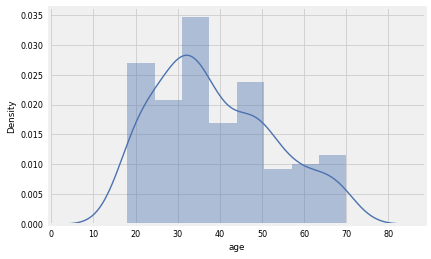

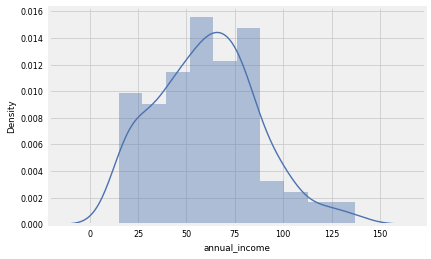

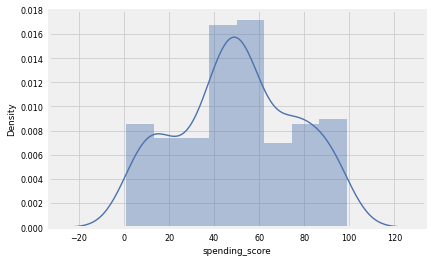

In [113]:
# check distribution of numeric columns : age, annual_income, spending_score
for col in df.select_dtypes('number').columns:
    sns.distplot(df[col])
    plt.show()


<AxesSubplot:ylabel='None'>

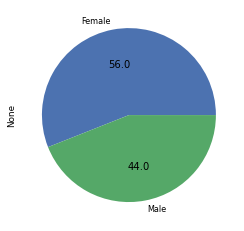

In [114]:
# visualize percentage of gender
df.groupby('gender').size().plot(kind='pie', autopct='%.1f')

<AxesSubplot:xlabel='gender', ylabel='count'>

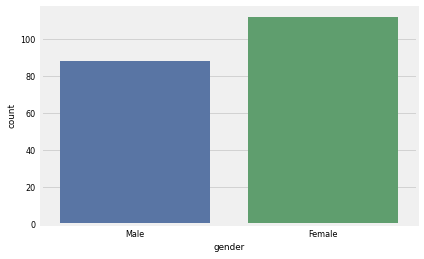

In [115]:
sns.countplot(df['gender'])

## Bivariate Analysis

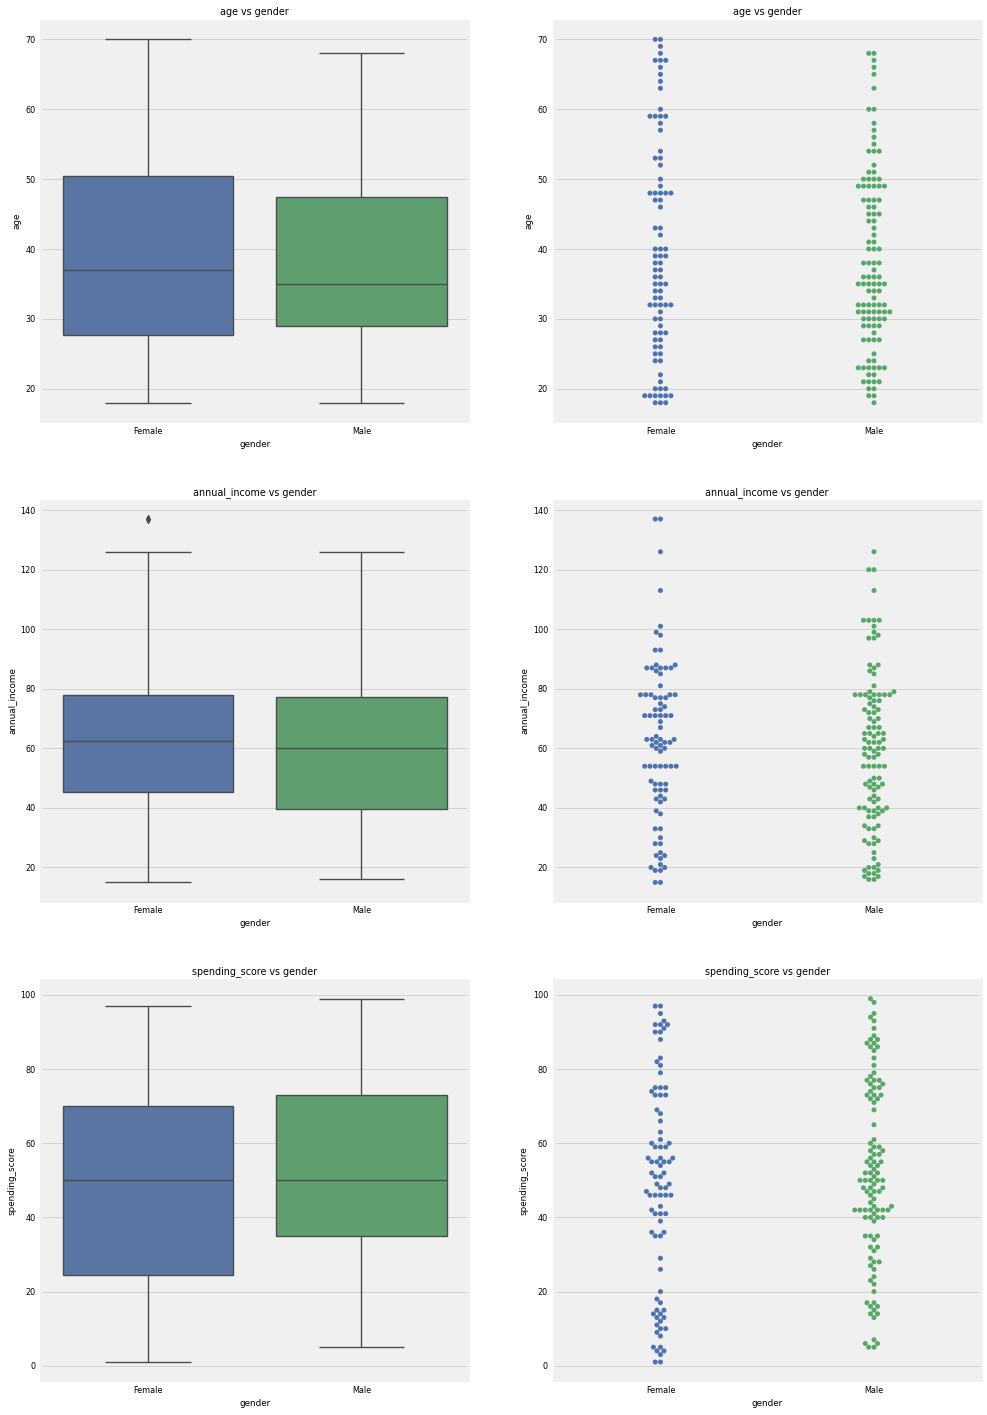

In [116]:
num_features = ['age','annual_income','spending_score'] 
fig = plt.subplots(nrows = 3, ncols = 2, figsize = (15,25))
for i in range(len(num_features)):
    
    plt.subplot(3, 2, (i * 2)  + 1)
    ax = sns.boxplot(x = 'gender',y = num_features[i], data = df)
    ax.set_xticklabels(['Female','Male'])
    title = num_features[i] + ' vs gender'
    plt.title(title)
    
    plt.subplot(3,2,(i * 2) + 2)
    ax = sns.swarmplot(x = 'gender',y = num_features[i],data = df)
    ax.set_xticklabels(['Female','Male'])
    title = num_features[i] + ' vs gender'
    plt.title(title)

## Multivariate Analaysis

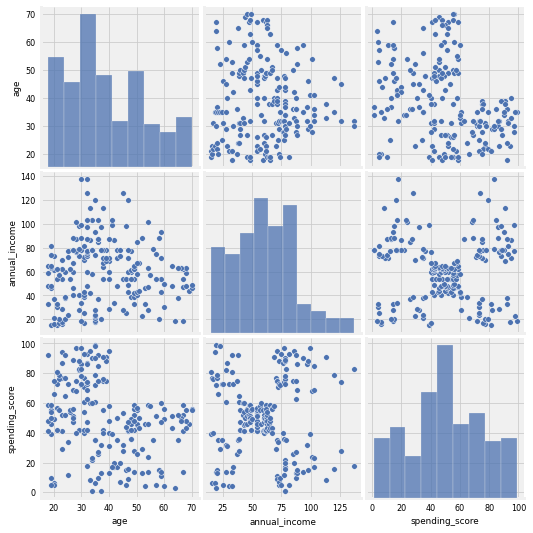

In [117]:
sns.pairplot(df)

<AxesSubplot:>

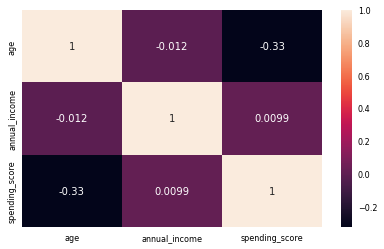

In [118]:
# visualize correlation
sns.heatmap(df.corr(), annot=True)

# 3. Feature Engineering

# 4. Modeling

# 5. Conclusion